# Using a BERT model finetuned for financial headlines

In [1]:
# Imoprts
from newsplease import NewsPlease
import requests
from bs4 import BeautifulSoup
import unidecode
import json
import re
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# Get news from Coinmarketcap
def get_news(num = 200):
    num_pages = num/200
    num_remaining = num
    news_data = []
    page = 1
    while num_remaining > 0:
        to_get = min(num_remaining, 200)
        url = f"https://api.coinmarketcap.com/content/v3/news?&page={page}&size={to_get}"
        res = requests.get(url)
        news_data += json.loads(res.text)['data']
        num_remaining -= to_get
        page += 1
    return news_data

In [3]:
# Get sentiment from BERT model
def prepare_text(text):
    return unidecode.unidecode(text.strip())

def get_sentiment(texts, url = 'http://127.0.0.1:8080/finbert'):
    js = { 'texts': texts }
    res = requests.post(url, json = js)
    return res.json()['ans']

def get_tweet_sentiment(tweet):
    sent = get_sentiment(tweet['text'])
    return sent

In [4]:
news = get_news(1000)
print(len(news))

1000


In [5]:
news_title_sub = [x['meta']['title'] + '. ' + x['meta']['subtitle'] for x in news]

In [9]:
sents = get_sentiment(news_title_sub[:50])
sents = np.array(sents)

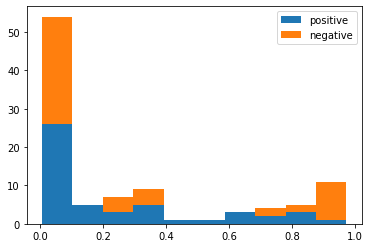

In [10]:
colors = ['positive', 'negative', 'neutral']
plt.hist(sents[:, [0, 1]], histtype = 'bar', stacked=True, label = colors)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


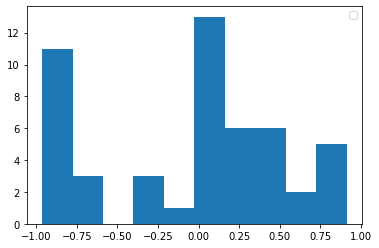

In [11]:
plt.hist(sents[:, 0] - sents[:, 1], histtype = 'bar')
plt.legend()

In [40]:
len(sents)

1000

In [42]:
counts = {i: news_title_sub.count(i) for i in news_title_sub}
{k: v for k, v in counts.items() if v > 1}

{}

In [ ]:
NewsPlease.